# Test Graph creation from arithmetic expression

Note, that for this to function graphviz needs to be installed.

In [11]:
import re
from graphviz import Digraph
from pprint import pprint

from arigin.graph.generation import graph_from_expression

In [12]:
expr = "2339 - ( 4124 * ( 5380 * ( 3147 / 4790 ) - 4669 / 979 - ( ( ( ( ( ( ( 3116 ) ) ) ) ) ) ) ) )"
print(eval(expr))

-1704407.897345295


In [13]:
ent = graph_from_expression(expr)

In [14]:
for r in ent["relationships"]:
    print(r.__class__.__name__)
    print(r.id)
    print(r.source)
    print(r.target)
    print()

IsLeftOperantOf
771c48314bbe3e16a8499e07b13f35d2
id='b850b5a700a387ee939f734015b76492' value=3147 expression='3147'
id='31ba0f4f67ea83609d6d499e71c4a14e' value=<OperatorType.DIVISION: '/'> expression='/'

IsRightOperantOf
dc215a55aa726ab0690129db37ba1cbd
id='2121e3a09d248a8af86722a7a19b4295' value=4790 expression='4790'
id='31ba0f4f67ea83609d6d499e71c4a14e' value=<OperatorType.DIVISION: '/'> expression='/'

ResultsIn
be7fbb8290ed87c2df36adcbcdcd83a8
id='31ba0f4f67ea83609d6d499e71c4a14e' value=<OperatorType.DIVISION: '/'> expression='/'
id='627bc4a49523ce7718ebe8eef80aec52' value=0.6569937369519833 expression='3147 / 4790'

IsLeftOperantOf
81bee09dc551a9fe62225f182dbd6d7f
id='e08f0bd4128e0fde686c5d0e795f8d1d' value=5380 expression='5380'
id='ab196bfd09d19bc67a65e12a35f13679' value=<OperatorType.MULTIPLICATION: '*'> expression='*'

IsRightOperantOf
602e9c1278abed38d14c61f39b7bc1ba
id='627bc4a49523ce7718ebe8eef80aec52' value=0.6569937369519833 expression='3147 / 4790'
id='ab196bfd09d19bc6

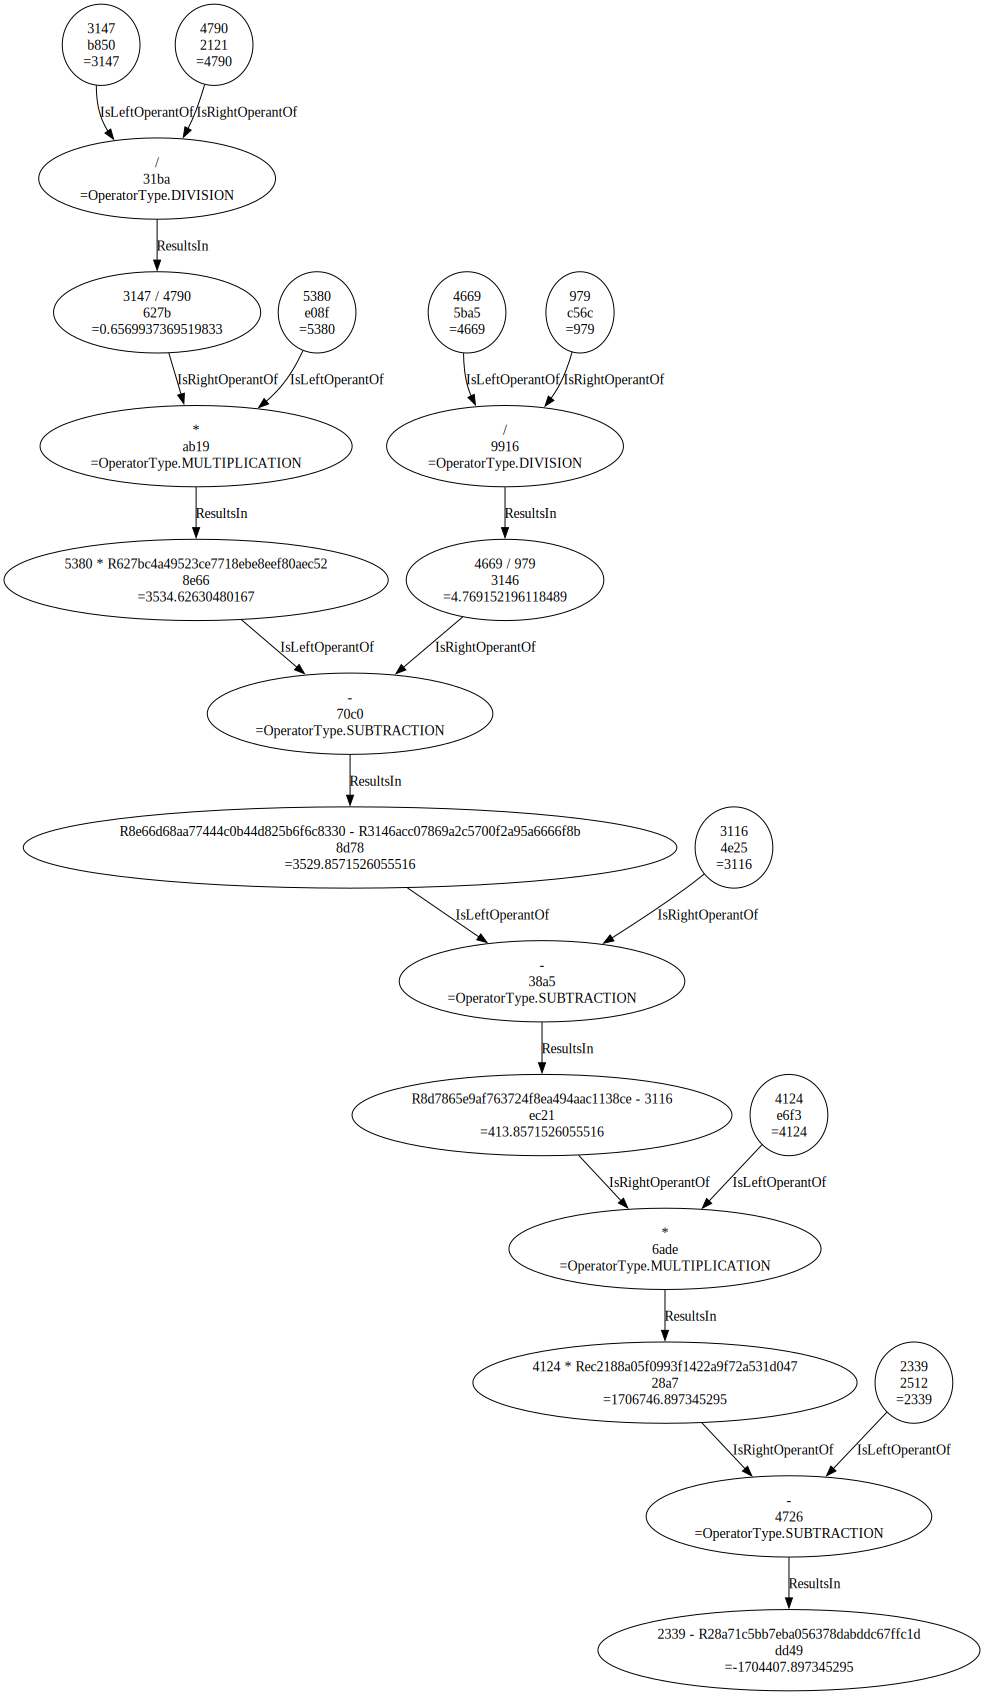

In [15]:
def rep(model):
    return (
        model.expression + "\n" + model.id[:4] + "\n =" + str(model.value)
    )

# Create Digraph object
dot = Digraph()
for node in ent["nodes"]:
    dot.node(rep(node))

for relationship in ent["relationships"]:
    dot.edge(rep(relationship.source), rep(relationship.target), label=relationship.__class__.__name__)

dot